<a href="https://colab.research.google.com/github/MohammadQasim03/Intelligence-Systems-C0559/blob/main/Support_Vector_Machine_ipynb_ML_APLHA_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import the numpy library and alias it as np
import numpy as np

# Import the pandas library and alias it as pd
import pandas as pd

# Import the matplotlib.pyplot module and alias it as plt
import matplotlib.pyplot as plt

# Import the seaborn library and alias it as sns
import seaborn as sns

# Import the datasets module from scikit-learn
from sklearn import datasets

# Import the metrics module from scikit-learn
from sklearn import metrics

# Enable inline plotting for matplotlib in Jupyter Notebook
%pylab inline

# Enable inline plotting for matplotlib in other environments
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# Load the iris dataset from scikit-learn datasets
iris = datasets.load_iris()

# Create a DataFrame from the iris dataset, combining the features and target values
# The features are stored in 'data' and the target values are stored in 'target'
# np.c_ concatenates the features and target values along the second axis
# The column names for the DataFrame are defined as feature_names plus 'target'
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

# Display the first few rows of the DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
# Count the occurrences of each unique value in the "target" column of the DataFrame
df["target"].value_counts()


target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

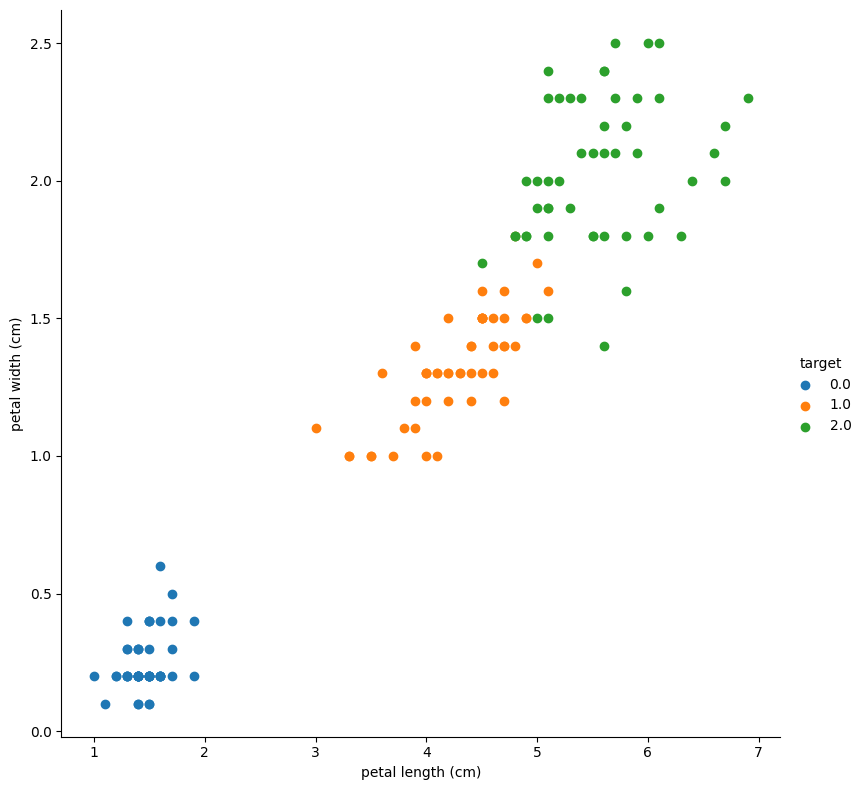

In [11]:
# Create a FacetGrid using seaborn, specifying the DataFrame and the column to hue by
# Height parameter determines the size of the FacetGrid
# Use plt.scatter to create a scatter plot, mapping "petal length (cm)" to the x-axis and "petal width (cm)" to the y-axis
# Hue parameter colors the data points based on the "target" column
# Add a legend to the plot to identify the different classes
sns.FacetGrid(df, hue="target", height=8).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

In [12]:
# Fit a Support Vector Machine (SVM) model to the data
# Import the svm module from scikit-learn
from sklearn import svm

# Initialize an SVM model with a linear kernel and regularization parameter C=0.1
model = svm.SVC(kernel='linear', C=0.1)

# Train the SVM model using the iris dataset
model.fit(iris.data, iris.target)

SVC(C=0.1, kernel='linear')

In [13]:
# Calculate the accuracy of the trained SVM model on the same dataset it was trained on
model.score(iris.data, iris.target)

0.9666666666666667

In [15]:
# Makes a Perdiction
# Store the true target values from the iris dataset in the variable 'expected'
expected = iris.target

# Use the trained SVM model to predict the target values based on the input features (iris data)
# Store the predicted target values in the variable 'predicted'
predicted = model.predict(iris.data)


In [16]:
# Import the metrics module from scikit-learn
from sklearn import metrics

# Print a classification report, including precision, recall, F1-score, and support, based on the comparison between expected and predicted values
print(metrics.classification_report(expected, predicted))

# Print the confusion matrix, showing the counts of true positive, false positive, true negative, and false negative predictions
print(metrics.confusion_matrix(expected, predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]


In [17]:
# Extract the first two features (columns) from the iris dataset and assign them to the variable 'X'
# The colon ':' indicates that we're selecting all rows, and ':2' indicates that we're selecting the first two columns
X = iris.data[:, :2]

# Extract the target variable (iris species) from the iris dataset and assign it to the variable 'y'
y = iris.target

In [18]:
# Define a function MySVMClassifier that takes three parameters: my_kernel, my_C, and my_gamma
def MySVMClassifier(my_kernel, my_C, my_gamma):

    # Initialize an SVM classifier with specified kernel, C, and gamma parameters
    svc = svm.SVC(kernel=my_kernel, C=my_C, gamma=my_gamma)

    # Train the SVM classifier on the feature matrix X and target vector y
    svc.fit(X, y)

    # Define step size for mesh grid
    h = 0.02

    # Define the range for x-axis and y-axis
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Generate mesh grid points for decision boundary plotting
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary
    plt.subplot(1, 1, 1)

    # Predict the class labels for mesh grid points
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the predictions to match the mesh grid shape
    Z = Z.reshape(xx.shape)

    # Plot the filled contour plot representing the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the training data points
    plt.scatter(X[:, 0], X[:, 1], c=y)

    # Set labels for x-axis and y-axis
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    # Set the limits for the x-axis and y-axis
    plt.xlim(xx.min(), xx.max())

    # Show the plot
    plt.show()

In [19]:
# Import the interact function from ipywidgets module
from ipywidgets import interact

In [20]:
# Import the interact function from ipywidgets module
# The interact function is used to create interactive widgets in Jupyter notebooks
# It allows users to interactively explore and manipulate data or functions
from ipywidgets import interact

In [21]:
# Create an interactive widget 'i' using the interact function, allowing users to interactively explore the MySVMClassifier function
# Users can choose between different kernel types ('linear' or 'rbf'), set the regularization parameter C within the range of 0.001 to 10,
# and set the gamma parameter within the range of 1 to 100
i = interact(MySVMClassifier, my_kernel=['linear', 'rbf'], my_C=(0.001, 10), my_gamma=(1, 100))

interactive(children=(Dropdown(description='my_kernel', options=('linear', 'rbf'), value='linear'), FloatSlide…